# Лабораторная работа №2

In [106]:
import matplotlib.pyplot as plt
import numpy as np

from numpy.fft import fft, ifft

In [107]:
def cyclic_freq(T: float):
    return 2 * np.pi / T

In [108]:
def period(f: float):
    return 1 / f

In [109]:
def apply_fft(func, dt: float, y: np.ndarray):

    xfft = np.fft.fftfreq(y.size) / dt
    yfft = func(y)

    return xfft, yfft   

In [110]:
def plot_signal(**kwards):
    
    # Точки временного пространства
    x  = kwards.get('x')
    y0 = kwards.get('y0')
    y1 = kwards.get('y1')
    
    # Точки частотного пространства
    xf  = kwards.get('xf')
    yf0 = kwards.get('yf0')
    yf1 = kwards.get('yf1')

    # Ограничение оси абсцисс
    t = kwards.get('t')
    f = kwards.get('f')

    # Легенды графиков
    legendy0  = kwards.get('legend_y0')
    legendy1  = kwards.get('legend_y1')
    legendyf0 = kwards.get('legend_yf0')
    legendyf1 = kwards.get('legend_yf1')

    fig = plt.figure()

    if y0 is not None:    
        ax = fig.add_subplot(211)

        ids = range(len(xf))

        if t is not None:   
            ids = np.logical_and(x >= t[0], x <= t[1])

        ax.plot(x[ids], y0[ids], 'b', label = legendy0)

        if y1 is not None:
            ax.plot(x[ids], y1[ids], '--', color = 'y', label = legendy1) 

        ax.set_ylabel('Амплитуда')
        ax.set_xlabel('Время, с')

        if any([legendy0, legendy1]):
            ax.legend(loc = 'upper right')

    if yf0 is not None:
        ax = fig.add_subplot(212)

        ids = range(len(xf))

        if f is not None: 
            ids = np.logical_and(xf >= f[0], xf <= f[1])

        ax.bar(xf[ids], np.abs(yf0[ids]) / len(yf0), label = legendyf0)

        if yf1 is not None:
            ax.plot(xf[ids], np.abs(yf1[ids] / len(yf1)), '--', color = 'y', label = legendyf1)

        ax.set_ylabel('Амплитуда')
        ax.set_xlabel('Частота, Гц')

        if any([legendyf0, legendyf1]):
            ax.legend(loc = 'upper right')

    fig.set_figwidth(8)
    fig.set_figheight(2 * len(fig.axes))

    fig.tight_layout()
    plt.show()

In [111]:
def func_x(func, A: float, T: float, t: tuple, sample_rate: int = 1000):

    x = np.linspace(t[0], t[1], num = sample_rate, endpoint = False)
    y = np.apply_along_axis(lambda z: func(z, A, cyclic_freq(T)), 0, x)

    return x, y

In [112]:
def cos_func(x: float, A: float, w: float):
    return A * np.cos(w * x)

## Задание 1

In [113]:
def DFT_slow(x):
    
    x = np.asarray(x, dtype = float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)

    return np.dot(M, x)

In [114]:
SAMPLE_RATE = 5000
A  = 2
t  = (0, 1)
f1 = 50
f2 = 150

In [115]:
x, y0 = func_x(cos_func, A, period(f1), t, SAMPLE_RATE)
_, y1 = func_x(cos_func, A, period(f2), t, SAMPLE_RATE)

y = y0 + y1

In [116]:
%timeit fft(y)
%timeit DFT_slow(y)

171 µs ± 27.5 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
3.15 s ± 265 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [117]:
xfft, yfft = apply_fft(fft, x[1] - x[0], y)
yifft = ifft(yfft).real

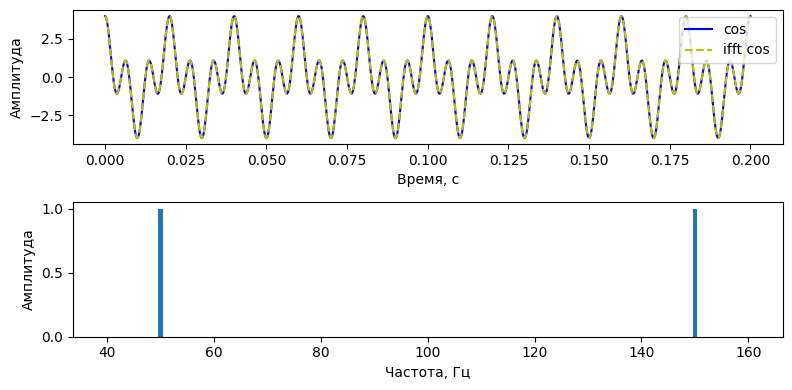

In [118]:
plot_signal(x = x, y0 = y, y1 = yifft, xf = xfft, yf0 = yfft, t = (0, 0.2), \
            f = (40, 160), legend_y0 = 'cos', legend_y1 = 'ifft cos')

In [119]:
x, y0 = func_x(cos_func, A, period(f1), (0, 1), SAMPLE_RATE)
_, y1 = func_x(cos_func, A, period(f2), (0, 1), SAMPLE_RATE)

y = y0 + y1 + np.random.normal(0, 1, len(y0))

In [120]:
xfft, yfft = apply_fft(fft, x[1] - x[0], y)
yifft = ifft(yfft).real

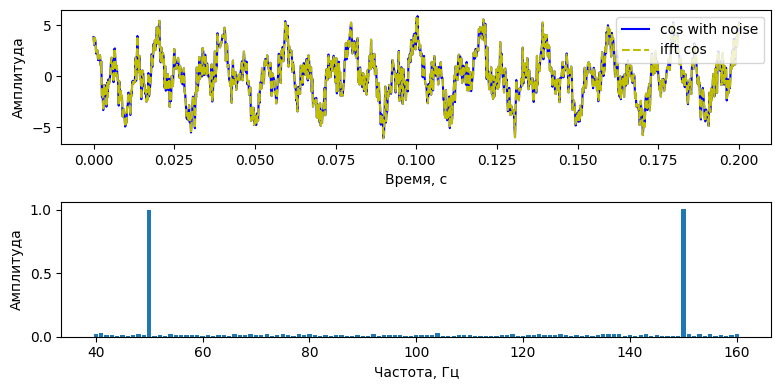

In [121]:
plot_signal(x = x, y0 = y, y1 = yifft, xf = xfft, yf0 = yfft, t = (0, 0.2), \
            f = (40, 160), legend_y0 = 'cos with noise', legend_y1 = 'ifft cos')

## Задание 2

In [122]:
def rect_func(x: float, A: float, w: float):
    return A * np.sign(np.sin(w * x))

In [123]:
SAMPLE_RATE = 5000
A = 2
T = 2
t = (0, 4)

In [124]:
x, y = func_x(rect_func, A, T, t, SAMPLE_RATE)

In [125]:
xfft, yfft0 = apply_fft(fft, x[1] - x[0], y)
_, yfft1 = apply_fft(DFT_slow, x[1] - x[0], y)

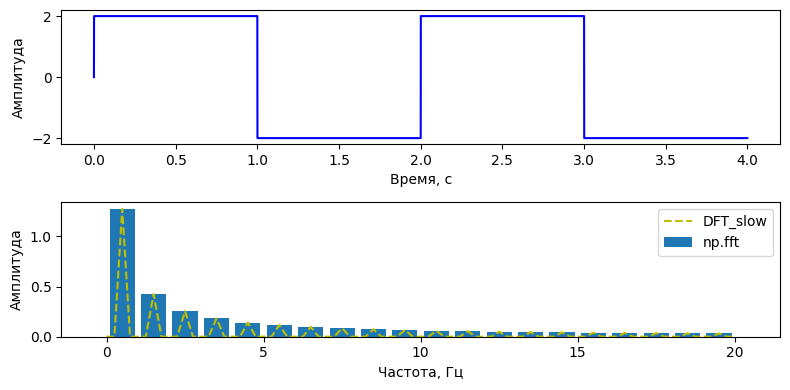

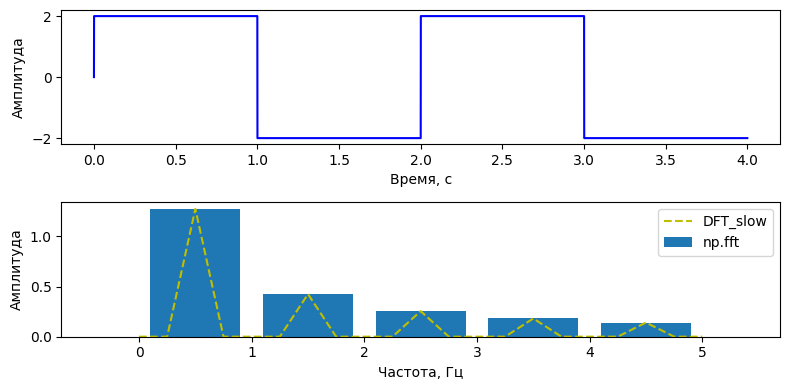

In [126]:
plot_signal(x = x, y0 = y, xf = xfft, yf0 = yfft0, yf1 = yfft1, \
            f = (0, 20), legend_yf0 = 'np.fft', legend_yf1 = 'DFT_slow')

plot_signal(x = x, y0 = y, xf = xfft, yf0 = yfft0, yf1 = yfft1, \
            f = (0, 5), legend_yf0 = 'np.fft', legend_yf1 = 'DFT_slow')

In [127]:
y1 = y + np.random.normal(0, 1, len(y))

In [128]:
xfft, yfft0 = apply_fft(fft, x[1] - x[0], y1)
_, yfft1 = apply_fft(DFT_slow, x[1] - x[0], y1)

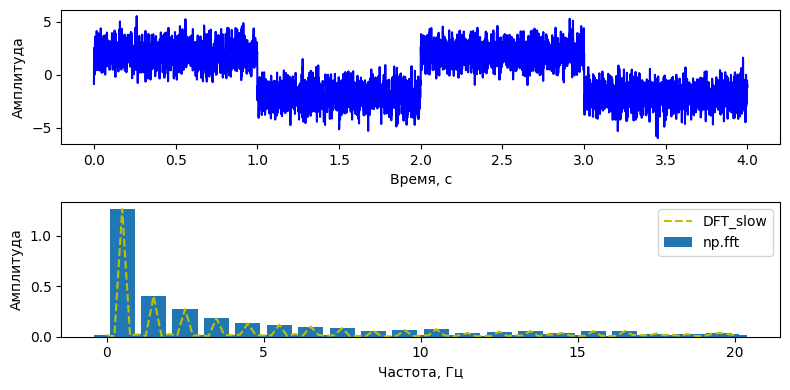

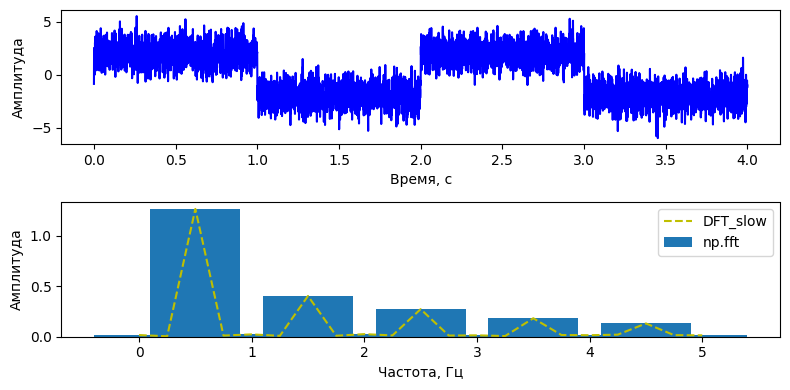

In [129]:
plot_signal(x = x, y0 = y1, xf = xfft, yf0 = yfft0, yf1 = yfft1, \
            f = (0, 20), legend_yf0 = 'np.fft', legend_yf1 = 'DFT_slow')

plot_signal(x = x, y0 = y1, xf = xfft, yf0 = yfft0, yf1 = yfft1, \
            f = (0, 5), legend_yf0 = 'np.fft', legend_yf1 = 'DFT_slow')

## Задание 3

In [130]:
def DFT_fast(x):

    N = len(x)
    W  = lambda m, n: np.exp(-2j * np.pi * m / n)
    x0 = lambda m: x[2 * m]
    x1 = lambda m: x[2 * m + 1]
    X0k = lambda k: np.sum([x0(m) * W(m * k, N // 2) for m in range(N // 2)])
    X1k = lambda k: np.sum([x1(m) * W(m * k, N // 2) for m in range(N // 2)])
    Xk0 = lambda k: X0k(k) + W(k, N) * X1k(k)
    Xk1 = lambda k: X0k(k) - W(k, N) * X1k(k)

    return np.concatenate(([Xk0(k) for k in range(N // 2)], [Xk1(k) for k in range(N // 2)]))


In [131]:
x, y = func_x(cos_func, A, period(50), (0, 1), SAMPLE_RATE)
xfft, yfft = apply_fft(DFT_fast, x[1] - x[0], y)

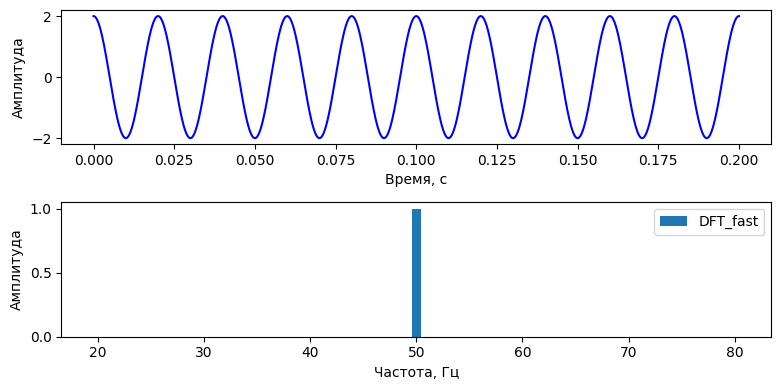

In [132]:
plot_signal(x = x, y0 = y, xf = xfft, yf0 = yfft, t = (0, 0.2), \
            f = (20, 80), legend_yf0 = 'DFT_fast')

In [133]:
%timeit fft(y)
%timeit DFT_slow(y)

141 µs ± 20.2 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.64 s ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
